In [3]:
import numpy as np
import matplotlib.pyplot as plt
import segyio

The data set we'll use in this example is the Kerry 3d in the Taranaki Basin offshore New Zealand. This data set has plenty of fault structures, and the volume is only 1.0 GB in size so isn't too unwieldy.

For more about the dataset: https://dataunderground.org/dataset/kerry

This assumes that you have already downloaded the data set and placed it inside a relative folder called `data`. If you don't have that configuration, go ahead and do that now.

In [4]:
fname = 'data/Kerry3D.segy'

In [5]:
with segyio.open(fname, strict=False) as s:
    data = np.stack(t.astype(np.float) for t in s.trace)

FileNotFoundError: [Errno 2] No such file or directory

With a bit more work we can also read the file header and the trace headers.

In [9]:
def chunks(s, n):
    """Produce `n`-character chunks from string `s`."""
    for start in range(0, len(s), n):
        yield s[start:start + n]

with segyio.open(fname, strict=False) as s:
    
    # Read the data.
    data = np.stack(t.astype(np.float) for t in s.trace)
    
    # Get the (x, y) locations.
    x = [t[segyio.TraceField.GroupX] for t in s.header]
    y = [t[segyio.TraceField.GroupY] for t in s.header]
    
    # Get the trace numbers.
    cdp = np.array([t[segyio.TraceField.CDP] for t in s.header])

    # Get the first textual header.
    header = s.text[0].decode('ascii')
    formatted = '\n'.join(chunk for chunk in chunks(header, 80))

    # Get data from the binary header.
    # Get the sample interval in ms (convert from microsec).
    sample_interval = s.bin[segyio.BinField.Interval] / 1000

print(formatted)

/Users/Evan/miniconda3/envs/geocomp/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


C01 AREA        : OFFSHORE TARANAKI - OFFSHORE TARANAKI SEISMIC DATABASE        
C02 DESCRIPTION : KERRY3D SEISMIC COVERAGE - PHASE MATCHED IN GEOFRAME          
C03 =========================================================================== 
C04 DATE     :1996       CLASS      :RAW MIGRATION /+90 DEGREE PHASE SHIFT      
C05 OPERATOR :WMC        PROCESSING :DIGICON SINGAPORE                          
C06 =========================================================================== 
C07 THE 3D DATA HAS BEEN DATUM AND PHASE SHIFTED. DATA HAS BEEN MERGED WITH     
C08 CHECKED NAV AND EXPORTED FROM GEOFRAME 4.2 IN STANDARD SEGY.                
C09 INLINES/SP RANGE :510-796 CDP INC       :1        SAMPLE INTERVAL :4000     
C10 XLINES/CDP RANGE :58-792  SAMPLES/TRACE :1251     FINAL TIME :5000          
C11 LINE INC      :1  TRACES/LINE   :VARIABLE IL/XL X/EAST Y/NORTH              
C12 =========================================================================== 
C13 THIS DATASET WAS PREPARE

In [10]:
cdp.shape

(210945,)

In [11]:
range_il = 796-510
range_il

286

In [12]:
range_xl = abs(58-792)
range_xl

734

In [13]:
(range_xl + 1) * (range_il + 1)

210945

In [14]:
cube = data.reshape((range_il+1, range_xl+1, -1))

In [15]:
cube.shape

(287, 735, 1252)

In [45]:
minx, maxx = 50, 700
miny, maxy = 50, 307  # 
dx, dy = 100, 100

for i in np.arange(30,250,10):
    for j in np.arange(1,7):
        print(minx, i, dx, dy)
        section = cube[i,minx+(j-1)*dx:50+(j*dx),100:100+dy]
        fig = plt.figure(frameon=False, figsize=(section.shape[0]/40, section.shape[1]/40))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.axis('off')
        ax.imshow(section.T, aspect=1.0, cmap='Greys', interpolation='nearest', clim=[-5,5])
        plt.savefig(f'section_{i}_{j}_inline.png', dpi=300)
        plt.close("all")

50 166 100 100
50 166 100 100
50 166 100 100
50 166 100 100
50 166 100 100
50 166 100 100


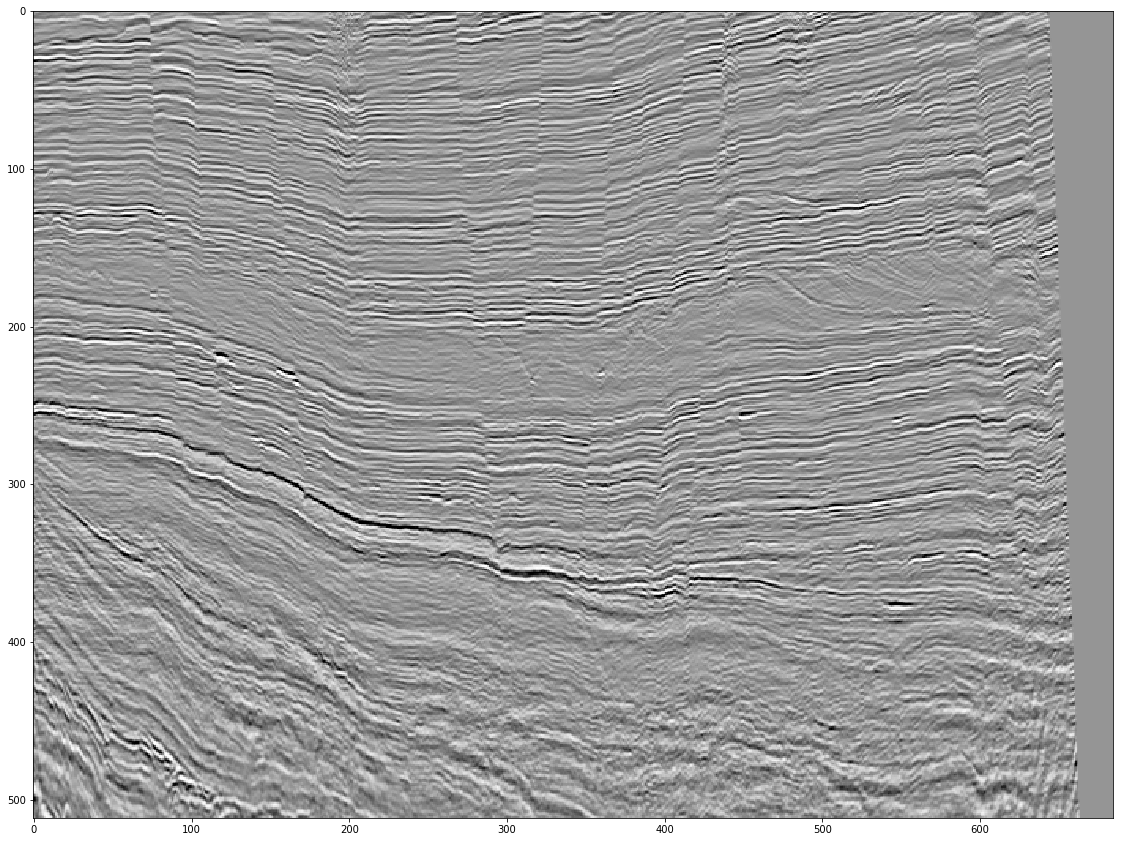

In [47]:
fig = plt.figure(frameon=False, figsize=(15, 15))
ax = fig.add_axes([0, 0, 1, 1])
i = 1
dx = 256
ax.imshow(cube[100,50+(i-1)*512:50+(i*1512),50:512+50].T, aspect=1.0, cmap='Greys', interpolation='nearest', clim=[-5,5])

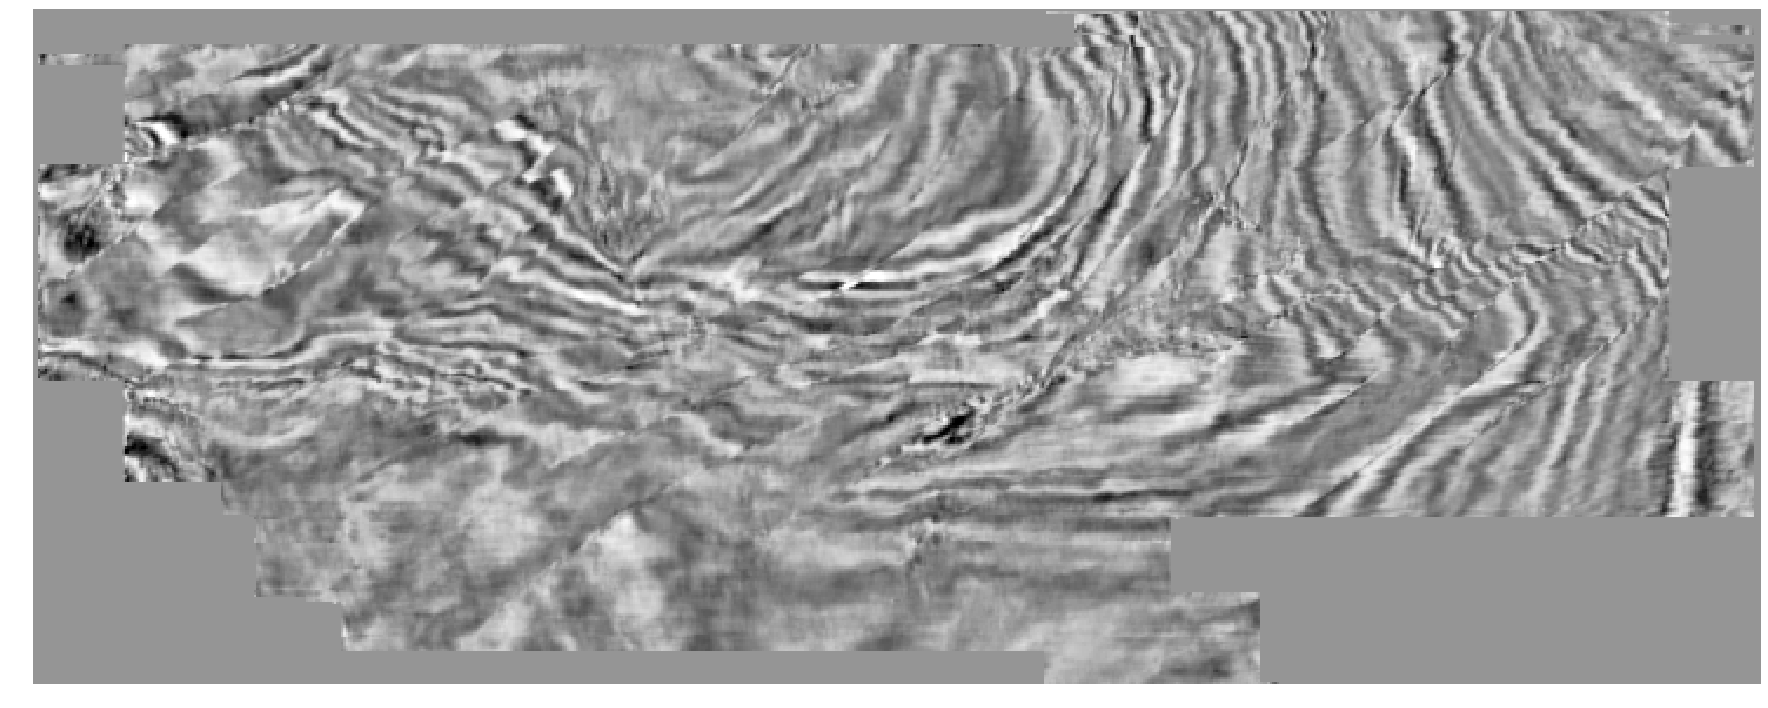

In [27]:
fig = plt.figure(frameon=False, figsize=(24, 20))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(cube[:,:,100], aspect=1.0, cmap='Greys', interpolation='nearest', clim=[-5,5])
    #plt.savefig(f'seismic_sections/section_{i}_inline.png', dpi=400)
    #plt.close("all")